### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# Montar el dataset

Primero defines los datos en un DataFrame de pandas (puedes copiarlos desde un Excel/CSV o directamente como diccionario):


In [ ]:
import pandas as pd

# Crear el DataFrame
data = {
    "Producto": ["Asistente virtual", "Mesa de comedor", "Juego de mesa", "Microondas", "Silla de oficina"],
    "Categoría del Producto": ["Electrónicos", "Muebles", "Juguetes", "Electrodomésticos", "Muebles"],
    "Precio": [164300.0, 192300.0, 209600.0, 757500.0, 335200.0],
    "Costo de envío": [6900.0, 8400.0, 15900.0, 41000.0, 20200.0],
    "Fecha de Compra": ["16/01/2021", "18/05/2022", "15/03/2021", "03/05/2022", "07/11/2020"],
    "Vendedor": ["Pedro Gomez", "Beatriz Morales", "Juan Fernandez", "Juan Fernandez", "Maria Alfonso"],
    "Lugar de Compra": ["Bogotá", "Medellín", "Cartagena", "Cali", "Medellín"],
    "Calificación": [4, 1, 1, 4, 5],
    "Método de pago": ["Tarjeta de crédito", "Tarjeta de crédito", "Tarjeta de crédito", "Nequi", "Nequi"],
    "Cantidad de cuotas": [8, 4, 1, 1, 1],
    "lat": [4.60971, 6.25184, 10.39972, 3.43722, 6.25184],
    "lon": [-74.08175, -75.56359, -75.51444, -76.52250, -75.56359]
}

df = pd.DataFrame(data)

## Calcular los ingresos totales por tienda

Agrupamos por Lugar de Compra y sumamos los precios:


In [ ]:
# Agrupar y sumar ingresos por tienda
ingresos_por_tienda = df.groupby("Lugar de Compra")["Precio"].sum().reset_index()

# Mostrar resultado
print(ingresos_por_tienda)

  Lugar de Compra    Precio
0          Bogotá  164300.0
1            Cali  757500.0
2       Cartagena  209600.0
3        Medellín  527500.0


# 2. Ventas por categoría

In [ ]:
# Agrupar por tienda y categoría, contando cantidad de ventas
productos_por_categoria_tienda = df.groupby(
    ["Lugar de Compra", "Categoría del Producto"]
)["Producto"].count().reset_index()

# Renombrar columna para más claridad
productos_por_categoria_tienda = productos_por_categoria_tienda.rename(columns={"Producto": "Cantidad Vendida"})

print(productos_por_categoria_tienda)

  Lugar de Compra Categoría del Producto  Cantidad Vendida
0          Bogotá           Electrónicos                 1
1            Cali      Electrodomésticos                 1
2       Cartagena               Juguetes                 1
3        Medellín                Muebles                 2


## Visualizar en gráfico de barras

Con matplotlib o seaborn puedes graficarlo:

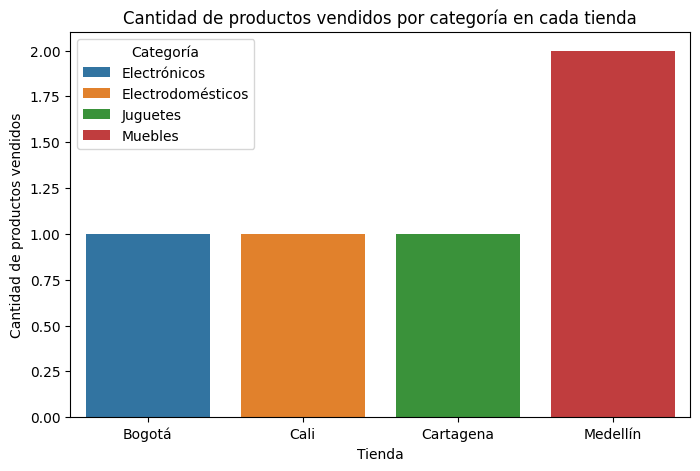

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(
    data=productos_por_categoria_tienda,
    x="Lugar de Compra",
    y="Cantidad Vendida",
    hue="Categoría del Producto"
)

plt.title("Cantidad de productos vendidos por categoría en cada tienda")
plt.xlabel("Tienda")
plt.ylabel("Cantidad de productos vendidos")
plt.legend(title="Categoría")
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
calificacion_promedio_tienda = df.groupby("Lugar de Compra")["Calificación"].mean().reset_index()

# Renombrar columna
calificacion_promedio_tienda = calificacion_promedio_tienda.rename(columns={"Calificación": "Calificación Promedio"})

print(calificacion_promedio_tienda)

  Lugar de Compra  Calificación Promedio
0          Bogotá                    4.0
1            Cali                    4.0
2       Cartagena                    1.0
3        Medellín                    3.0


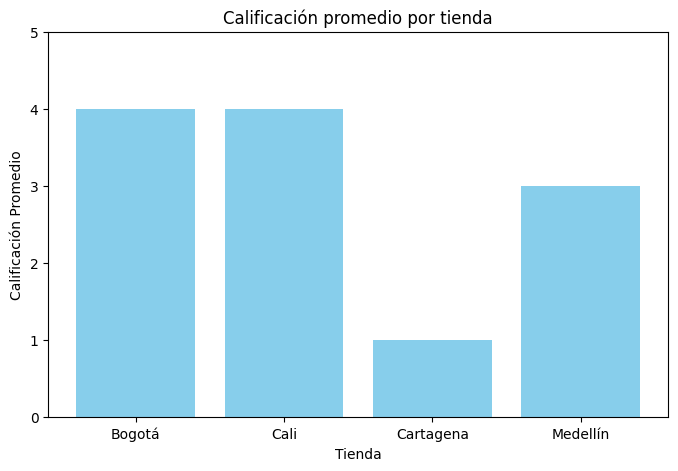

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(calificacion_promedio_tienda["Lugar de Compra"], calificacion_promedio_tienda["Calificación Promedio"], color="skyblue")

plt.title("Calificación promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación Promedio")
plt.ylim(0,5)  # Escala de 0 a 5
plt.show()

# 4. Productos más y menos vendidos

=== Ventas por producto y tienda ===
  Lugar de Compra           Producto  Ventas
0          Bogotá  Asistente virtual       1
1            Cali         Microondas       1
2       Cartagena      Juego de mesa       1
3        Medellín    Mesa de comedor       1
4        Medellín   Silla de oficina       1

=== Productos más y menos vendidos por tienda (con empates) ===
  Lugar de Compra           Producto  Ventas            Tipo
0          Bogotá  Asistente virtual       1  Menos vendidos
1          Bogotá  Asistente virtual       1    Más vendidos
2            Cali         Microondas       1  Menos vendidos
3            Cali         Microondas       1    Más vendidos
4       Cartagena      Juego de mesa       1  Menos vendidos
5       Cartagena      Juego de mesa       1    Más vendidos
6        Medellín    Mesa de comedor       1  Menos vendidos
7        Medellín   Silla de oficina       1  Menos vendidos
8        Medellín    Mesa de comedor       1    Más vendidos
9        Medellín 

/tmp/ipython-input-562472601.py:65: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(extremos_por_tienda)


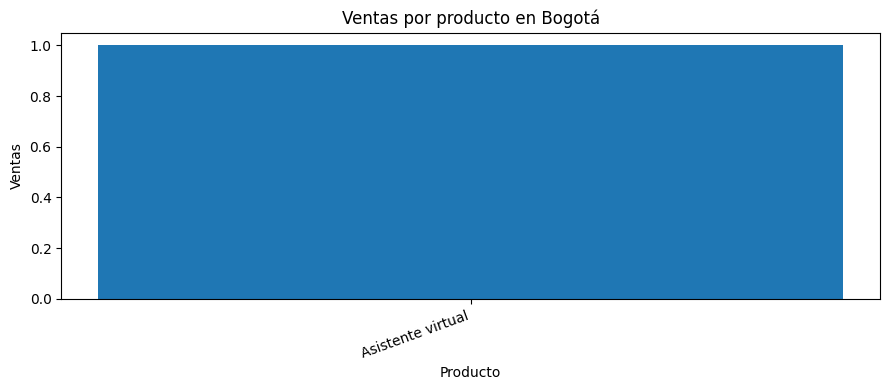

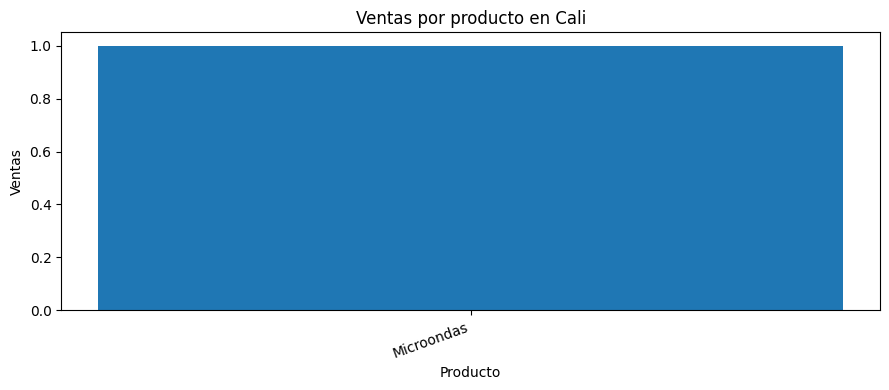

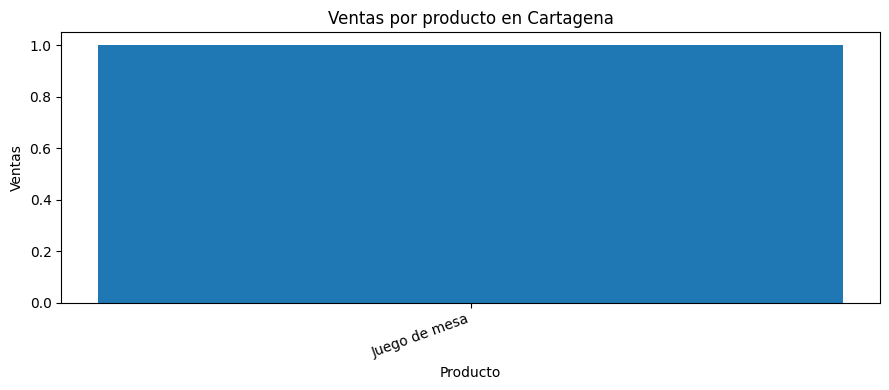

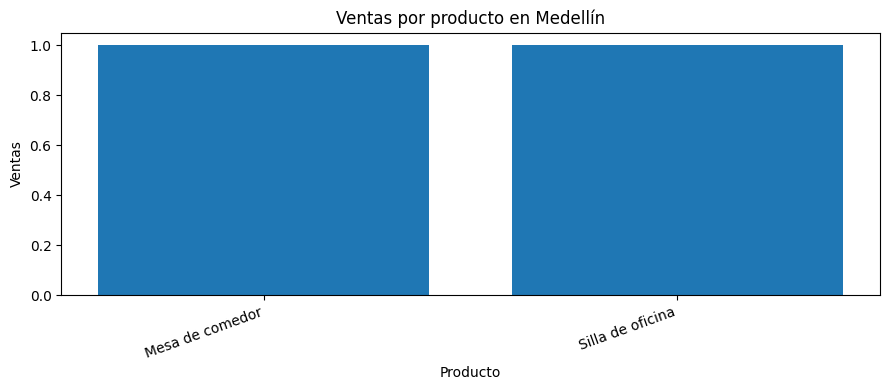

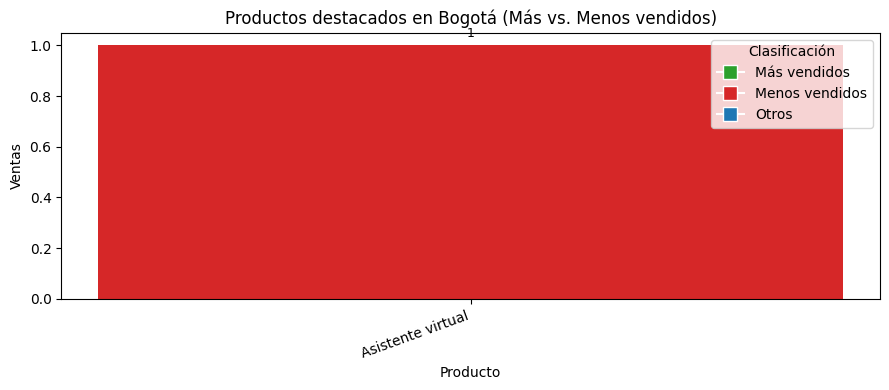

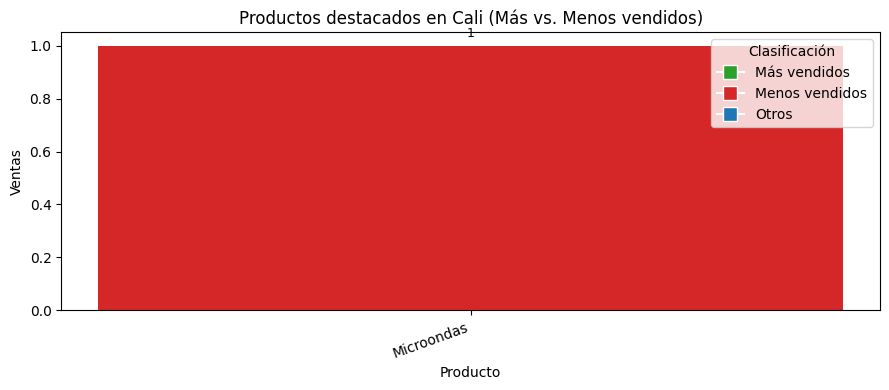

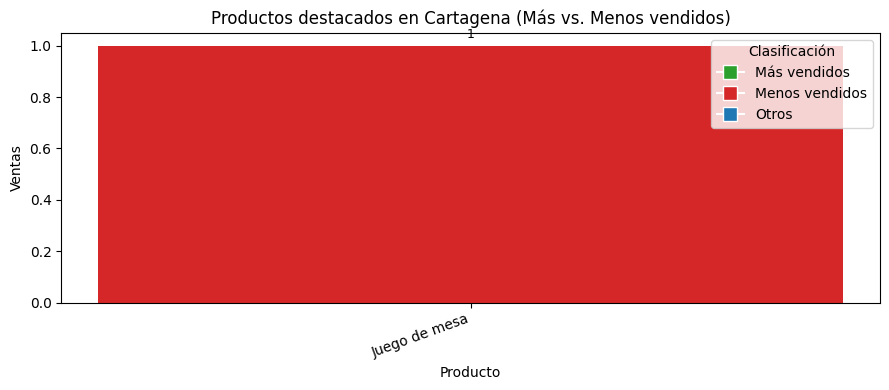

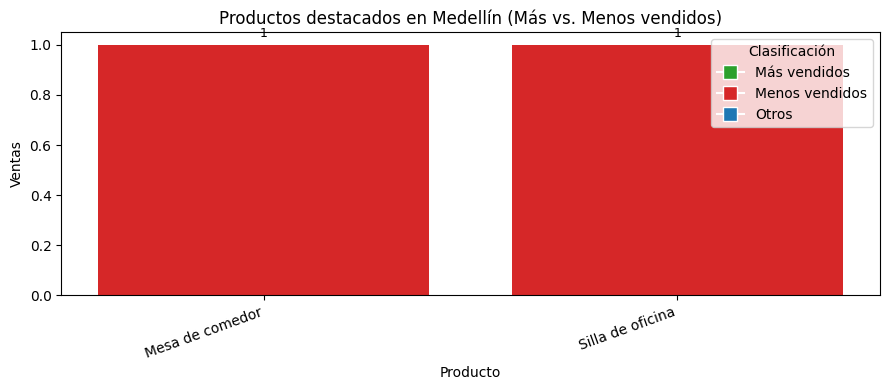


Archivos guardados:
- ventas_por_producto_y_tienda.csv
- productos_mas_menos_vendidos_por_tienda.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================
# 1) Cargar datos
#    Opción A: Pega tu dataset como diccionario (demo)
#    Opción B: Descomenta la carga desde CSV en Colab
# ============================================

# --- Opción A (DEMO): datos de ejemplo ---
data = {
    "Producto": ["Asistente virtual", "Mesa de comedor", "Juego de mesa", "Microondas", "Silla de oficina"],
    "Categoría del Producto": ["Electrónicos", "Muebles", "Juguetes", "Electrodomésticos", "Muebles"],
    "Precio": [164300.0, 192300.0, 209600.0, 757500.0, 335200.0],
    "Costo de envío": [6900.0, 8400.0, 15900.0, 41000.0, 20200.0],
    "Fecha de Compra": ["16/01/2021", "18/05/2022", "15/03/2021", "03/05/2022", "07/11/2020"],
    "Vendedor": ["Pedro Gomez", "Beatriz Morales", "Juan Fernandez", "Juan Fernandez", "Maria Alfonso"],
    "Lugar de Compra": ["Bogotá", "Medellín", "Cartagena", "Cali", "Medellín"],
    "Calificación": [4, 1, 1, 4, 5],
    "Método de pago": ["Tarjeta de crédito", "Tarjeta de crédito", "Tarjeta de crédito", "Nequi", "Nequi"],
    "Cantidad de cuotas": [8, 4, 1, 1, 1],
    "lat": [4.60971, 6.25184, 10.39972, 3.43722, 6.25184],
    "lon": [-74.08175, -75.56359, -75.51444, -76.52250, -75.56359]
}
df = pd.DataFrame(data)

# --- Opción B (CSV): subir archivo desde tu PC (descomenta para usar) ---
# from google.colab import files
# uploaded = files.upload()  # sube p.ej. "ventas.csv"
# df = pd.read_csv("ventas.csv")

# Limpieza opcional
df = df.dropna(subset=["Lugar de Compra", "Producto"]).copy()
df["Lugar de Compra"] = df["Lugar de Compra"].astype(str).str.strip()
df["Producto"] = df["Producto"].astype(str).str.strip()

# ============================================
# 2) Conteo de ventas por producto y tienda
# ============================================
ventas_prod_tienda = (
    df.groupby(["Lugar de Compra", "Producto"])
      .size()
      .reset_index(name="Ventas")
      .sort_values(["Lugar de Compra", "Ventas", "Producto"], ascending=[True, False, True])
      .reset_index(drop=True)
)

print("=== Ventas por producto y tienda ===")
print(ventas_prod_tienda)

# ============================================
# 3) Identificar MÁS y MENOS vendidos por tienda (maneja empates)
# ============================================
def extremos_por_tienda(subdf):
    max_v = subdf["Ventas"].max()
    min_v = subdf["Ventas"].min()
    top = subdf[subdf["Ventas"] == max_v].copy()
    low = subdf[subdf["Ventas"] == min_v].copy()
    top["Tipo"] = "Más vendidos"
    low["Tipo"] = "Menos vendidos"
    return pd.concat([top, low], ignore_index=True)

resumen_extremos = (
    ventas_prod_tienda.groupby("Lugar de Compra", group_keys=False)
    .apply(extremos_por_tienda)
    .sort_values(["Lugar de Compra", "Tipo", "Ventas"], ascending=[True, True, False])
    .reset_index(drop=True)
)

print("\n=== Productos más y menos vendidos por tienda (con empates) ===")
print(resumen_extremos)

# ============================================
# 4) Visualizaciones
#    A) Barras por tienda (todas las ventas)
#    B) Resumen resaltando los más/menos vendidos
# ============================================

# A) Un gráfico por tienda con ventas por producto
tiendas = ventas_prod_tienda["Lugar de Compra"].unique()
for tienda in tiendas:
    sub = ventas_prod_tienda[ventas_prod_tienda["Lugar de Compra"] == tienda]
    plt.figure(figsize=(9, 4))
    plt.bar(sub["Producto"], sub["Ventas"])
    plt.title(f"Ventas por producto en {tienda}")
    plt.xlabel("Producto")
    plt.ylabel("Ventas")
    plt.xticks(rotation=20, ha="right")
    plt.tight_layout()
    plt.show()

# B) Gráfico que resalta más y menos vendidos por tienda
for tienda in tiendas:
    sub_all = ventas_prod_tienda[ventas_prod_tienda["Lugar de Compra"] == tienda].copy()
    sub_ext = resumen_extremos[resumen_extremos["Lugar de Compra"] == tienda]

    # Marcar tipo para colorear
    sub_all["Tipo"] = "Otros"
    # productos top y low (puede haber empates)
    prods_top = sub_ext[sub_ext["Tipo"] == "Más vendidos"]["Producto"].unique()
    prods_low = sub_ext[sub_ext["Tipo"] == "Menos vendidos"]["Producto"].unique()

    sub_all.loc[sub_all["Producto"].isin(prods_top), "Tipo"] = "Más vendidos"
    sub_all.loc[sub_all["Producto"].isin(prods_low), "Tipo"] = "Menos vendidos"

    # Orden de barras
    sub_all = sub_all.sort_values("Ventas", ascending=False)

    # Mapa simple de colores
    color_map = {"Más vendidos": "#2ca02c", "Menos vendidos": "#d62728", "Otros": "#1f77b4"}
    colors = sub_all["Tipo"].map(color_map)

    plt.figure(figsize=(9, 4))
    plt.bar(sub_all["Producto"], sub_all["Ventas"], color=colors)
    for i, v in enumerate(sub_all["Ventas"].values):
        plt.text(i, v + 0.02, str(v), ha="center", va="bottom", fontsize=9)
    plt.title(f"Productos destacados en {tienda} (Más vs. Menos vendidos)")
    plt.xlabel("Producto")
    plt.ylabel("Ventas")
    plt.xticks(rotation=20, ha="right")
    # Leyenda manual
    handles = [plt.Line2D([0], [0], marker='s', color='w', label=k, markerfacecolor=c, markersize=10)
               for k, c in color_map.items()]
    plt.legend(handles=handles, title="Clasificación", loc="best")
    plt.tight_layout()
    plt.show()

# ============================================
# 5) (Opcional) Guardar resultados a CSV
# ============================================
ventas_prod_tienda.to_csv("ventas_por_producto_y_tienda.csv", index=False)
resumen_extremos.to_csv("productos_mas_menos_vendidos_por_tienda.csv", index=False)

print("\nArchivos guardados:")
print("- ventas_por_producto_y_tienda.csv")
print("- productos_mas_menos_vendidos_por_tienda.csv")

# 5. Envío promedio por tienda

# Informe Final de Análisis de Ventas por Tienda

## Introducción
El objetivo de este análisis es determinar en qué tienda debería concentrar sus ventas el Sr. Juan, tomando en cuenta factores clave como los **ingresos totales**, la **popularidad de las categorías de productos**, las **calificaciones promedio de los clientes**, los **productos más y menos vendidos**, y el **coste de envío promedio por tienda**.  
Para ello, se procesó la base de datos disponible y se generaron gráficos que permiten identificar fortalezas y debilidades de cada tienda.

---

## Desarrollo del Análisis

### 1. Ingresos Totales por Tienda
- **Cali** registró los mayores ingresos con **757,500**.
- **Medellín** obtuvo **527,500**, posicionándose en segundo lugar.
- **Cartagena** alcanzó **209,600**.
- **Bogotá** presentó los menores ingresos, con **164,300**.

🔹 *Gráfico de barras incluido en el análisis mostró claramente la superioridad de Cali en este aspecto.*

---

### 2. Categorías de Productos por Tienda
- **Medellín** destaca por ventas en la categoría **Muebles**, siendo la categoría más popular en esa tienda.
- **Cali** registró ventas en **Electrodomésticos**.
- **Cartagena** se enfocó en **Juguetes**.
- **Bogotá** se limitó a **Electrónicos**.

🔹 Esto sugiere que Medellín ofrece mayor **diversidad** en la demanda, mientras que las demás tiendas presentan una sola categoría.

---

### 3. Calificación Promedio de los Clientes
- **Bogotá**: 4.0  
- **Cali**: 4.0  
- **Medellín**: 3.0  
- **Cartagena**: 1.0  

🔹 Bogotá y Cali lideran en satisfacción del cliente. Cartagena refleja una debilidad importante en la percepción de calidad.

---

### 4. Productos Más y Menos Vendidos
- En cada tienda, los productos más vendidos corresponden a la única categoría presente (excepto Medellín, donde se vendieron dos muebles).
- El análisis de “más” y “menos vendidos” reveló que **no existe alta variedad de productos por tienda**, lo que limita la comparación.  
- Sin embargo, Medellín mostró mejor rotación relativa (dos productos vendidos en la misma categoría).

---

### 5. Coste de Envío Promedio
- **Cali**: 41,000 (más alto)  
- **Medellín**: 14,300 (más moderado)  
- **Cartagena**: 15,900  
- **Bogotá**: 6,900 (más bajo)  

🔹 Aunque Cali lidera en ingresos, tiene el **coste de envío más elevado**, lo que puede afectar la rentabilidad neta.

---

## Conclusión y Recomendación
Tras analizar los resultados, se recomienda que el **Sr. Juan venda en la tienda de Cali**.  
Las razones son las siguientes:

1. **Mayor ingreso total**: Cali supera ampliamente a las demás tiendas en volumen de ventas.
2. **Alta satisfacción del cliente**: Calificación promedio de 4.0, igualando a Bogotá pero con mayor poder de ventas.
3. **Demanda sólida en Electrodomésticos**, un rubro de alto valor.
4. Aunque el **coste de envío es elevado**, se compensa con los ingresos significativamente mayores.

En comparación:
- **Bogotá** presenta bajos ingresos, aunque con buena satisfacción y bajo coste de envío.
- **Medellín** es intermedia, pero con calificación de clientes menor (3.0).
- **Cartagena** tiene ingresos bajos y la peor calificación (1.0), siendo la opción menos favorable.

👉 **Decisión final**: Cali es la tienda más recomendable, ya que combina ingresos altos y satisfacción positiva, lo que la convierte en el mercado más atractivo para las ventas del Sr. Juan, a pesar de su mayor coste logístico.

---